<center><img src="https://media.licdn.com/dms/image/D4D0BAQHOLNi1297n2g/company-logo_200_200/0/1697658047551?e=1707955200&v=beta&t=PaSbWR-y89ji3AKX9SAQs4dHjmhhgENXgMzasUTpgrE"></center>

This Project is the traditionnal machine learning project, the main objective is to practice `Python`, `Data Cleaning`, `Data Visualization` `Machine Learning`.

The main objectif is to train a machine learning model for titanic prediction based on a structured data.

# Set Up the envirement  
* Importing all necessary libraries : 

In [2]:
import pandas as pd
import math as mt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

* Importing DataSet from `CSV` file using Pandas : 

In [3]:
df = pd.read_csv("./train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Checking the shape of the data frame : 

In [4]:
df.shape

(891, 12)

So we have $891$ of rows and $12$ colomns , till now we have $11$ features and $x_1, x_2, ..., x_{11}$ and two type of decisions $y = \{0, 1\}$ .

Actually we don't need all the data, just some of them are enagh to make a good decisions :

# Data visualization : 

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We Want to know the type of the distribution of age, sex and Classes

<Axes: xlabel='Survived', ylabel='Count'>

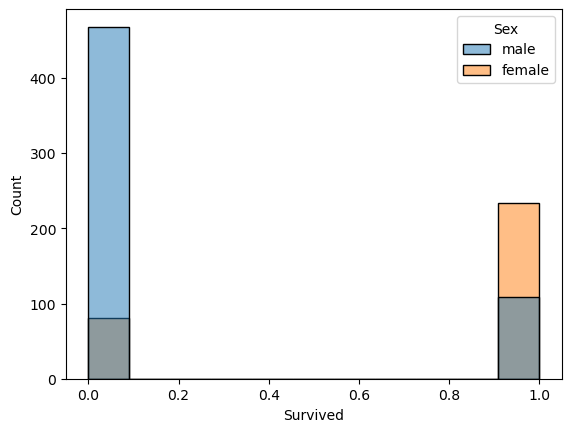

In [24]:
sns.histplot(data=df, x="Survived", hue="Sex")

<Axes: xlabel='Age', ylabel='Count'>

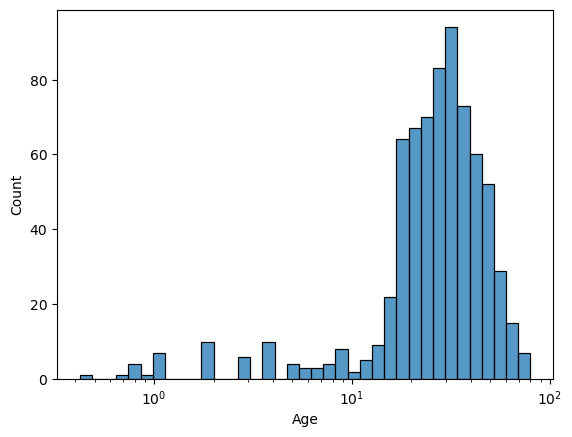

In [26]:
sns.histplot(data=df, x="Age", log_scale=True)

In [ ]:
sns.pairplot(df, hue="Age")

: 

* Data cleaning : 

In [7]:
sex = df["Sex"]

# we have data non numerical, we need to change it into numerical values : 

# Convert the sex array into numpy
sex = np.array(sex)

# We will make 0: male and  1: female
for i in range(0, sex.shape[0]):
    if sex[i] == "female":
        sex[i] = float(1)
    if sex[i] == "male":
        sex[i] = float(0)

# Convert the numpy array to a torch tensor : 
sex = sex.astype(float) # Migrate from dtype = object to dtype = float because tensors accept only float objects as a data 
sex = torch.tensor(sex)

# Convert the sex object to a matrix (1 x D) : 
sex = sex.reshape((1, sex.shape[0]))
sex.shape

torch.Size([1, 891])

For the class , it's easy, we already have numerical values : 

In [8]:
Pclass = df["Pclass"]
Pclass = np.array(Pclass)

In [9]:
# changing the dtype of the array : 
Pclass = Pclass.astype(float)

# Creating the tensor : 
Pclass = torch.tensor(Pclass)

In [10]:
Pclass = Pclass.reshape((1, Pclass.shape[0]))
Pclass.shape

torch.Size([1, 891])

Age data set is also simple : 

In [11]:
age = df["Age"]
age = np.array(age)

# Replace all the NAN values with 0 : 

for i in range(age.shape[0]):
    if mt.isnan(age[i]):
        age[i] = float(0.0)

In [12]:
age[0: 20]  # Showing 19 values 

array([22., 38., 26., 35., 35.,  0., 54.,  2., 27., 14.,  4., 58., 20.,
       39., 14., 55.,  2.,  0., 31.,  0.])

In [13]:
# Tensor transformations
age = torch.tensor(age)
age = age.reshape((1, age.shape[0]))

In [14]:
age.shape

torch.Size([1, 891])

In [15]:
# Creating the new dataset : 

new_df = torch.cat((sex, age, Pclass), 0)
new_df.shape

torch.Size([3, 891])

We need to introduce the y vector of $y = \{0, 1\}$

In [16]:
target = df["Survived"]
target = np.array(target)
target = target.astype(float)
target = torch.tensor(target)

In [17]:
target

tensor([0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1.,
        0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0.,
        1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1.,
        0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
        0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0.,
        0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
        0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0.,
        1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1.,
        1., 0., 1., 0., 1., 0., 0., 0., 

# Data visualization For New Data: 

The Objective of this part is to see the distribution of our data in order to understand the problem more .

* Linear plotting for The diffrents features and our target .

In [18]:
new_df[0, :].shape[0]

891

In [19]:
male = 0
female = 0
for i in range(new_df[0, :].shape[0]) : 
    if new_df[0, :][i] == 0 : 
        male = male + 1 
    else : 
        female = female + 1

male_rate = round((male/new_df[0, :].shape[0]) * 100, 2)
female_rate = round((female/new_df[0, :].shape[0]) * 100, 2)

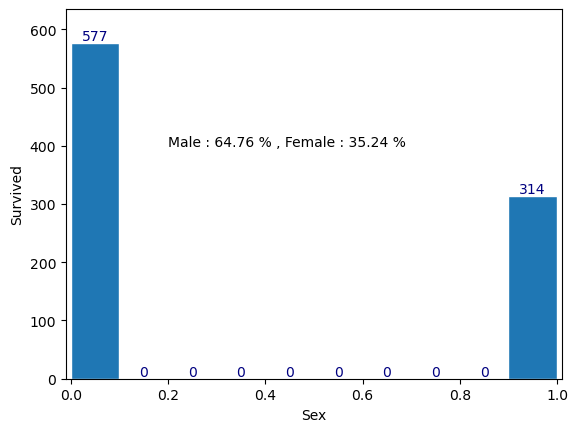

In [20]:
# Displaying the sex in function of the target :

text = f"Male : {male_rate} % , Female : {female_rate} %"

plt.text(0.2, 400, text)
values, bins, bars = plt.hist(new_df[0, :], edgecolor='white')
plt.xlabel("Sex")
plt.ylabel("Survived")
plt.bar_label(bars, fontsize=10, color='navy')
plt.margins(x=0.01, y=0.1)
plt.show()

We will change the notation of our data from `new_df` to `X` 

# Training : 

* Preparing the data class : 

In [21]:
torch.manual_seed(1)    # To gte the same result every time we run the code

In [22]:
class Dataset(Dataset):
    
    def __init__(self):
        self.x = new_df
        self.y = target
        self.w = torch.randn(new_df.shape[1], 1)
        self.b = 1
        self.f = torch.mm(self.x, self.w) + self.b
        self.len = self.x.shape[0]
    
    def __getitem__(self, index):
        return self.x[index], self.y[index]

    def __len__(self):
        return self.len